# Question 1

## Part (a)

$N_{H} = N_{W} = 14$; $N_{C} = 8$<br>

## Part (b)
There are $32$ Kernel filters in the third `convolution2dLayer` layer. The size of each 
Kernel filter (a tensor) is $3 \times 3 \times 32$

## Part (c)
The `fullyConnectedLayer` layer has $10$ neurons and $7 \times 7 \times 32$ inputs from the last 
`reluLayer`

## Part (d)

# Load and Explore Image Data

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# Load mnist images dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# categorical label, convert to one_hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


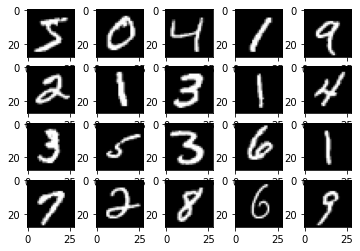

In [2]:
# plot first few images
for i in range(20):
	plt.subplot(4,5,i+1)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Specify Training and Validation Sets

In [3]:
from sklearn.model_selection import train_test_split

# Divide the data into 75% training and 25% validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, shuffle=True, random_state=0)

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Val  : X=%s, y=%s' % (X_val.shape, y_val.shape))
print('Test : X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(45000, 28, 28), y=(45000, 10)
Val  : X=(15000, 28, 28), y=(15000, 10)
Test : X=(10000, 28, 28), y=(10000, 10)


# Define Network Architecture

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten

In [5]:
# NOTE: you can play around with normalization before or after ReLU activation
net = Sequential()
net.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1)))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(MaxPooling2D((2, 2),strides=2))

net.add(Conv2D(16, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(MaxPooling2D((2, 2),strides=2))

net.add(Conv2D(32, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(Flatten())
net.add(Dense(10, activation='softmax'))

# Train


In [6]:
from tensorflow.keras.optimizers import SGD

In [7]:
# Hyperparameters
lr = 0.01
mom = 0.9 
ep = 10
bs = 100

In [8]:
# compile and fit the keras model
opt = SGD(learning_rate=lr, momentum=mom)
net.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = net.fit(X_train, y_train, epochs=ep, batch_size=bs, validation_data=(X_val,y_val), verbose=1)

Epoch 1/10
450/450 [==============================] - 32s 69ms/step - loss: 0.1599 - accuracy: 0.9504 - val_loss: 0.0918 - val_accuracy: 0.9701
Epoch 2/10
450/450 [==============================] - 31s 69ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0582 - val_accuracy: 0.9821
Epoch 3/10
450/450 [==============================] - 31s 68ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0478 - val_accuracy: 0.9859
Epoch 4/10
450/450 [==============================] - 31s 69ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0478 - val_accuracy: 0.9867
Epoch 5/10
450/450 [==============================] - 31s 69ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0469 - val_accuracy: 0.9861
Epoch 6/10
450/450 [==============================] - 31s 70ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0476 - val_accuracy: 0.9859
Epoch 7/10
450/450 [==============================] - 31s 70ms/step - loss: 0.0202 - accuracy: 0.9944 - val_loss: 0.0421 - val_accuracy:

# Test

In [9]:
# You can visualize the results with a confusion matrix.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((y_test.shape[1],y_test.shape[1]))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')

313/313 [==============================] - 4s 11ms/step - loss: 0.0305 - accuracy: 0.9901
Test loss: 0.03047509677708149
Test accuracy: 0.9901000261306763


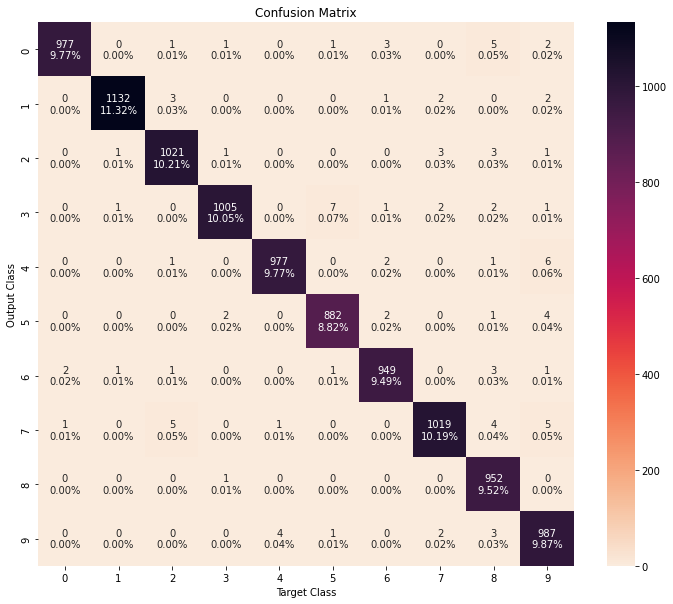

In [10]:
# Evaluate the trained model using keras built-in function
score = net.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(net.predict(X_test), axis=1)
y_true =  np.argmax(y_test, axis=1)
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)